In [10]:
import torch
import torch.nn as nn
import numpy as np
from gensim.models import KeyedVectors
from main import run

In [11]:
def load_glove_embeddings(file_path, word_to_index, embedding_dim):
    embeddings = {}
    with open(file_path, "r", encoding="utf-8") as file:
        for line in file:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype="float32")
            embeddings[word] = coefs

    num_words = len(word_to_index) + 1  # add 1 for the padding token
    embedding_matrix = np.zeros((num_words, embedding_dim))

    for word, index in word_to_index.items():
        if (embedding := embeddings.get(word)) is not None:
            embedding_matrix[index] = embedding
        else:
            embedding_matrix[index] = embeddings.get("<unk>", np.zeros(embedding_dim))

    return embedding_matrix

In [12]:
def load_word2vec_embeddings(file_path, word_to_index, embedding_dim):
    model = KeyedVectors.load_word2vec_format(file_path, binary=True)
    embedding_matrix = np.zeros((len(word_to_index) + 1, embedding_dim))

    for word, index in word_to_index.items():
        embedding_matrix[index] = (
            model[word] if word in model else np.zeros(embedding_dim)
        )

    return embedding_matrix

In [13]:
def load_fasttext_embeddings(embedding_file, word_index, embedding_dim):
    embeddings_index = {}
    with open(embedding_file, encoding="utf-8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype="float32")
            embeddings_index[word] = coefs

    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    return embedding_matrix

In [14]:
class Rnn(nn.Module):
    def __init__(self, embedding_matrix, hidden_size, output_size, embedding_dim):
        super(Rnn, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(
            torch.FloatTensor(embedding_matrix), padding_idx=0
        )
        self.rnn = nn.RNN(
            input_size=embedding_dim, hidden_size=hidden_size, batch_first=True
        )
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        output, _ = self.rnn(x)
        output = self.fc(output)
        return output

In [15]:
class Lstm(nn.Module):
    def __init__(self, embedding_matrix, hidden_size, output_size, embedding_dim):
        super(Lstm, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(
            torch.FloatTensor(embedding_matrix), padding_idx=0
        )
        self.lstm = nn.LSTM(
            input_size=embedding_dim, hidden_size=hidden_size, batch_first=True
        )
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out)
        return output

In [16]:
class Gru(nn.Module):
    def __init__(self, embedding_matrix, hidden_size, output_size, embedding_dim):
        super(Gru, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(
            torch.FloatTensor(embedding_matrix), padding_idx=0
        )
        self.gru = nn.GRU(
            input_size=embedding_dim, hidden_size=hidden_size, batch_first=True
        )
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        output, _ = self.gru(x)
        output = self.fc(output)
        return output

In [17]:
run(
    load_glove_embeddings,
    300,
    "../word_embeddings/glove.6B.300d.txt",
    Rnn,
    "rnn_glove",
    30,
)

KeyboardInterrupt: 

Epoch: 60/60
Validation Loss: 0.2358
Validation Macro F1: 0.3587
Training Macro F1: 0.4384


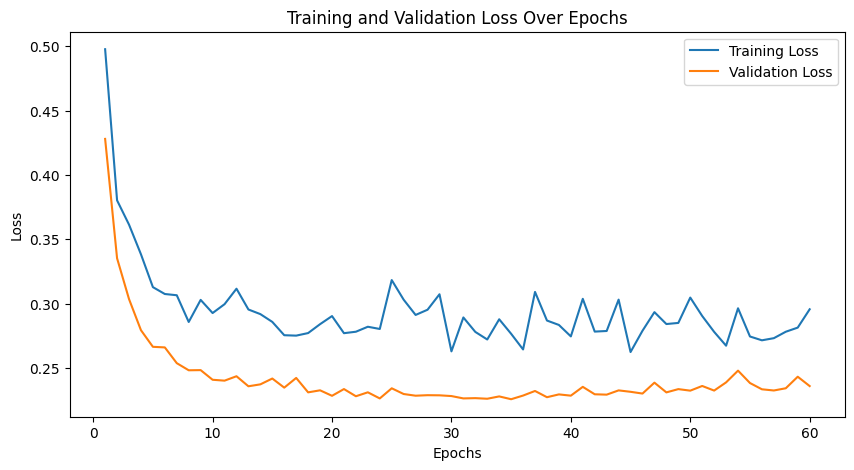

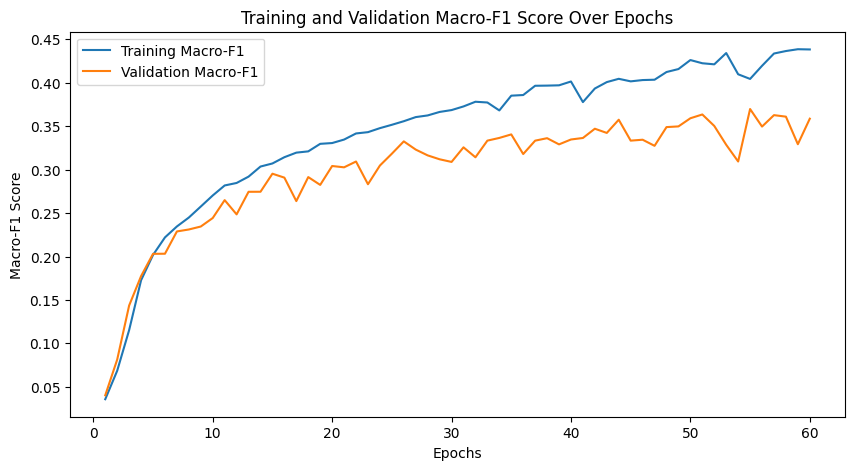

Final Test Accuracy: 0.9380
Final Test Macro F1: 0.3431
Classification Report for Test Data:
                 precision    recall  f1-score   support

             O       0.96      0.99      0.97     56540
       B_COURT       0.39      0.16      0.23       177
       I_COURT       0.51      0.34      0.41       324
  B_PETITIONER       0.00      0.00      0.00         9
  I_PETITIONER       0.14      0.09      0.11        11
  B_RESPONDENT       0.33      0.20      0.25         5
  I_RESPONDENT       0.14      0.25      0.18         8
       B_JUDGE       0.00      0.00      0.00         8
       I_JUDGE       0.00      0.00      0.00         6
        B_DATE       0.87      0.80      0.83       221
        I_DATE       0.77      0.72      0.74       102
         B_ORG       0.00      0.00      0.00       159
         I_ORG       0.24      0.09      0.13       308
         B_GPE       0.49      0.13      0.20       179
         I_GPE       1.00      0.02      0.05        43
     B_ST

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
run(
    load_glove_embeddings,
    100,
    "../word_embeddings/glove.6B.100d.txt",
    Rnn,
    "rnn_glove",
    60,
)

Epoch: 20/20
Validation Loss: 0.1530
Validation Macro F1: 0.5291
Training Macro F1: 0.5996


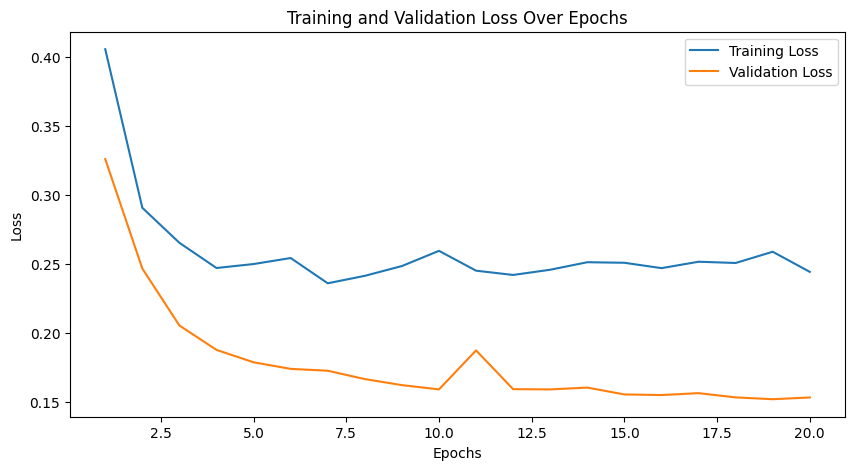

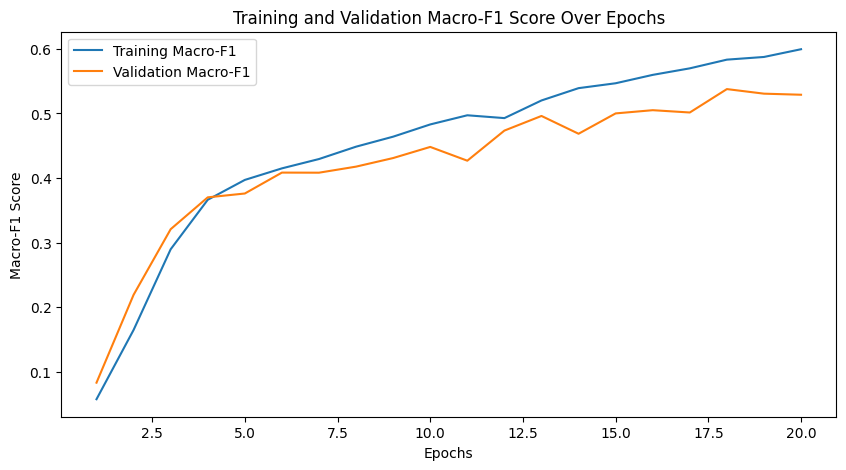

Final Test Accuracy: 0.9554
Final Test Macro F1: 0.5073
Classification Report for Test Data:
                 precision    recall  f1-score   support

             O       0.97      0.99      0.98     56540
       B_COURT       0.88      0.75      0.81       177
       I_COURT       0.78      0.78      0.78       324
  B_PETITIONER       0.33      0.22      0.27         9
  I_PETITIONER       0.67      0.36      0.47        11
  B_RESPONDENT       0.00      0.00      0.00         5
  I_RESPONDENT       0.00      0.00      0.00         8
       B_JUDGE       0.30      0.38      0.33         8
       I_JUDGE       0.17      0.17      0.17         6
        B_DATE       0.85      0.78      0.81       221
        I_DATE       0.58      0.76      0.66       102
         B_ORG       0.67      0.25      0.37       159
         I_ORG       0.52      0.33      0.41       308
         B_GPE       0.52      0.29      0.37       179
         I_GPE       0.38      0.12      0.18        43
     B_ST

In [19]:
run(
    load_word2vec_embeddings,
    300,
    "../word_embeddings/GoogleNews-vectors-negative300.bin",
    Rnn,
    "rnn_word2vec",
    20,
)

Epoch: 20/20
Validation Loss: 0.1358
Validation Macro F1: 0.5636
Training Macro F1: 0.6450


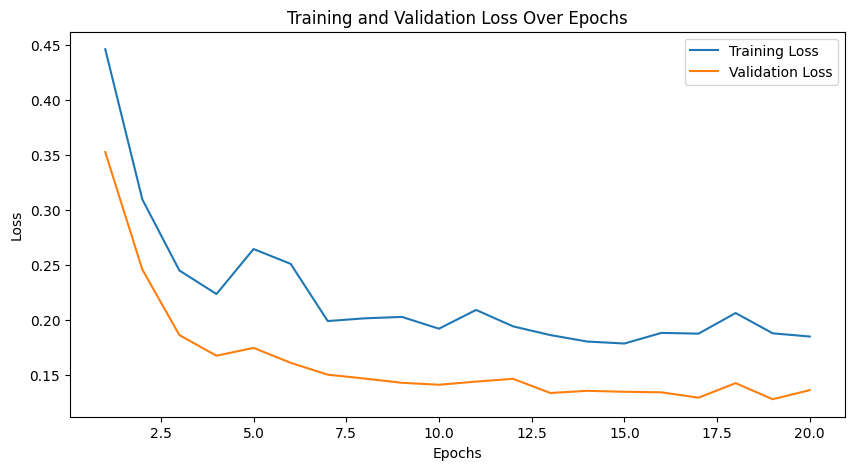

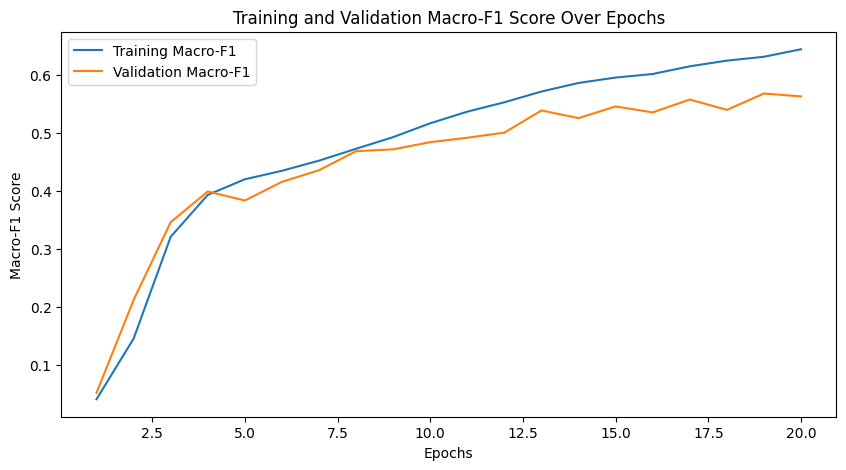

Final Test Accuracy: 0.9608
Final Test Macro F1: 0.5517
Classification Report for Test Data:
                 precision    recall  f1-score   support

             O       0.97      1.00      0.98     56540
       B_COURT       0.93      0.68      0.78       177
       I_COURT       0.92      0.63      0.75       324
  B_PETITIONER       0.50      0.22      0.31         9
  I_PETITIONER       0.75      0.27      0.40        11
  B_RESPONDENT       0.50      0.40      0.44         5
  I_RESPONDENT       0.67      0.25      0.36         8
       B_JUDGE       0.23      0.38      0.29         8
       I_JUDGE       0.14      0.17      0.15         6
        B_DATE       0.89      0.83      0.86       221
        I_DATE       0.88      0.88      0.88       102
         B_ORG       0.72      0.19      0.31       159
         I_ORG       0.69      0.28      0.40       308
         B_GPE       0.56      0.35      0.43       179
         I_GPE       0.36      0.21      0.26        43
     B_ST

In [21]:
run(
    load_fasttext_embeddings,
    300,
    "../word_embeddings/wiki-news-300d-1M.vec",
    Rnn,
    "rnn_fasttext",
    20,
)

Epoch: 20/20
Validation Loss: 0.2223
Validation Macro F1: 0.3238
Training Macro F1: 0.3660


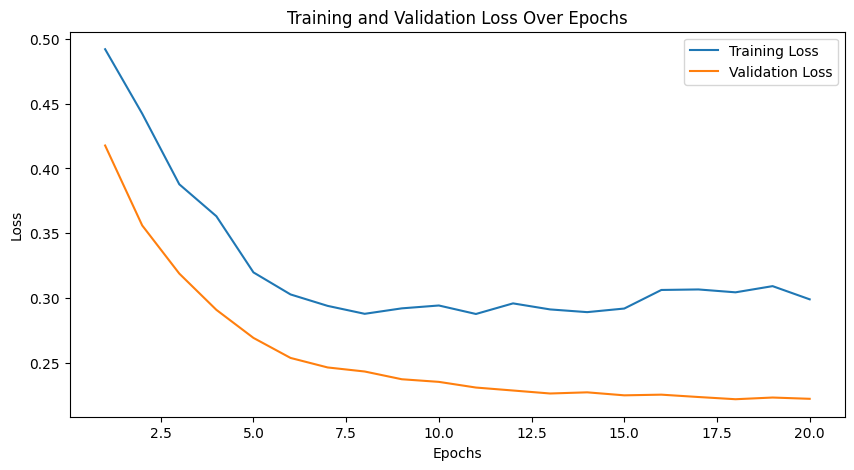

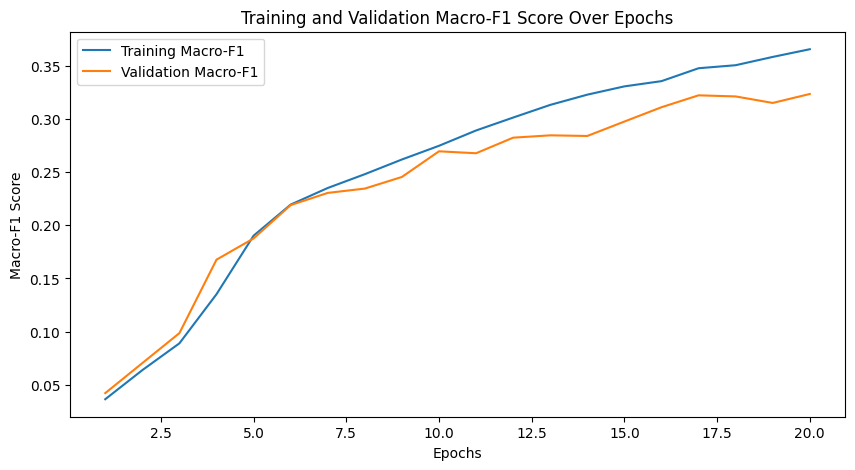

Final Test Accuracy: 0.9402
Final Test Macro F1: 0.3437
Classification Report for Test Data:
                 precision    recall  f1-score   support

             O       0.95      0.99      0.97     56540
       B_COURT       0.60      0.15      0.24       177
       I_COURT       0.61      0.27      0.37       324
  B_PETITIONER       0.00      0.00      0.00         9
  I_PETITIONER       0.33      0.09      0.14        11
  B_RESPONDENT       0.50      0.20      0.29         5
  I_RESPONDENT       0.50      0.12      0.20         8
       B_JUDGE       0.00      0.00      0.00         8
       I_JUDGE       0.00      0.00      0.00         6
        B_DATE       0.86      0.80      0.83       221
        I_DATE       0.75      0.70      0.72       102
         B_ORG       0.00      0.00      0.00       159
         I_ORG       0.36      0.08      0.14       308
         B_GPE       0.51      0.20      0.29       179
         I_GPE       0.00      0.00      0.00        43
     B_ST

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
run(
    load_glove_embeddings,
    100,
    "../word_embeddings/glove.6B.100d.txt",
    Lstm,
    "lstm_glove",
    20,
)

Epoch: 20/20
Validation Loss: 0.1481
Validation Macro F1: 0.5314
Training Macro F1: 0.6360


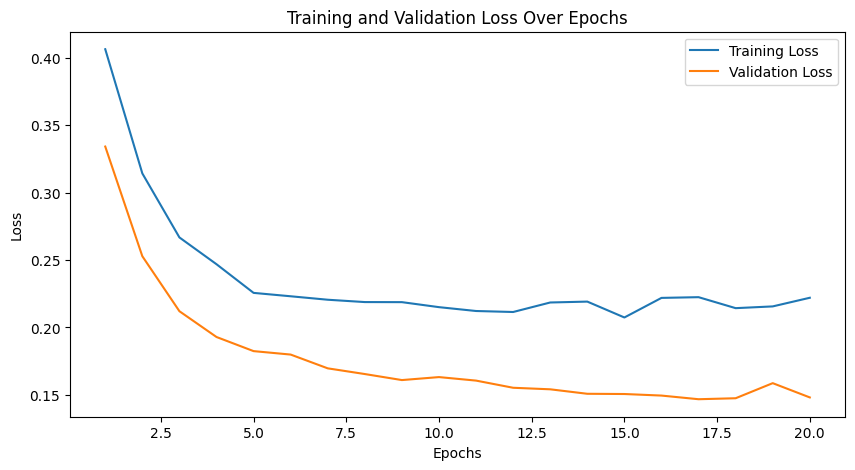

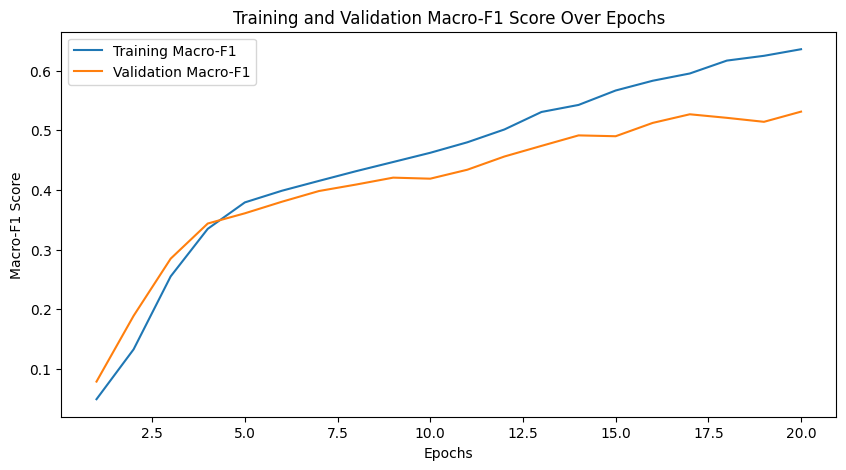

Final Test Accuracy: 0.9574
Final Test Macro F1: 0.5390
Classification Report for Test Data:
                 precision    recall  f1-score   support

             O       0.97      0.99      0.98     56540
       B_COURT       0.92      0.71      0.80       177
       I_COURT       0.84      0.71      0.77       324
  B_PETITIONER       0.75      0.33      0.46         9
  I_PETITIONER       1.00      0.27      0.43        11
  B_RESPONDENT       0.00      0.00      0.00         5
  I_RESPONDENT       0.50      0.25      0.33         8
       B_JUDGE       0.50      0.25      0.33         8
       I_JUDGE       0.50      0.17      0.25         6
        B_DATE       0.85      0.80      0.82       221
        I_DATE       0.68      0.72      0.70       102
         B_ORG       0.65      0.22      0.33       159
         I_ORG       0.62      0.38      0.47       308
         B_GPE       0.56      0.28      0.37       179
         I_GPE       0.60      0.14      0.23        43
     B_ST

In [26]:
run(
    load_word2vec_embeddings,
    300,
    "../word_embeddings/GoogleNews-vectors-negative300.bin",
    Lstm,
    "lstm_word2vec",
    20,
)

In [ ]:
run(
    load_fasttext_embeddings,
    300,
    "../word_embeddings/wiki-news-300d-1M.vec",
    Lstm,
    "lstm_fasttext",
    20,
)

In [ ]:
run(
    load_glove_embeddings,
    300,
    "../word_embeddings/glove.6B.300d.txt",
    Gru,
    "gru_glove",
    60,
)

In [ ]:
run(
    load_word2vec_embeddings,
    300,
    "../word_embeddings/GoogleNews-vectors-negative300.bin",
    Gru,
    "gru_word2vec",
    60,
)

In [ ]:
run(
    load_fasttext_embeddings,
    300,
    "../word_embeddings/wiki-news-300d-1M.vec",
    Gru,
    "gru_fasttext",
    30,
)